<a href="https://colab.research.google.com/github/istanislau/estudos_suicidios/blob/master/suicidios_com_armas_de_fogo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise dos suicidios com arma de fogo de 1996 até 2016


# Início das análises

##importação da biblioteca e informações da análise


Fonte dos dados IPEA - http://www.ipea.gov.br/atlasviolencia/dados-series/32

Perguntas a serem respondidas:
 - Qual o estado com maior incidência?
 - Média de casos nos estados por ano?
 - O estatudo do desarmamento teve algum efeito?

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
dados = pd.read_csv('dados_ipea.csv', sep=';')

## Análises preliminares

---



In [0]:
dados.shape

(560, 4)

In [0]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 4 columns):
cod        560 non-null int64
nome       560 non-null object
período    560 non-null int64
valor      560 non-null int64
dtypes: int64(3), object(1)
memory usage: 17.6+ KB


In [0]:
dados.head()

,cod,nome,período,valor
0,12,AC,1996,2
1,27,AL,1996,16
2,13,AM,1996,15
3,16,AP,1996,2
4,29,BA,1996,19


In [0]:
dados['valor'].describe().round(2)

count    560.00
mean      44.41
std       61.35
min        1.00
25%       10.00
50%       22.00
75%       45.00
max      313.00
Name: valor, dtype: float64

Separaçao dos dados por estado

In [0]:
AC = dados.query('nome== "AC"').reset_index().drop(columns=['index'])
AL = dados.query('nome== "AL"').reset_index().drop(columns=['index'])
AM = dados.query('nome== "AM"').reset_index().drop(columns=['index'])
AP = dados.query('nome== "AP"').reset_index().drop(columns=['index'])
BA = dados.query('nome== "BA"').reset_index().drop(columns=['index'])
CE = dados.query('nome== "CE"').reset_index().drop(columns=['index'])
DF = dados.query('nome== "DF"').reset_index().drop(columns=['index'])
ES = dados.query('nome== "ES"').reset_index().drop(columns=['index'])
GO = dados.query('nome== "GO"').reset_index().drop(columns=['index'])
MA = dados.query('nome== "MA"').reset_index().drop(columns=['index'])
MG = dados.query('nome== "MG"').reset_index().drop(columns=['index'])
MS = dados.query('nome== "MS"').reset_index().drop(columns=['index'])
MT = dados.query('nome== "MT"').reset_index().drop(columns=['index'])
PA = dados.query('nome== "PA"').reset_index().drop(columns=['index'])
PB = dados.query('nome== "PB"').reset_index().drop(columns=['index'])
PE = dados.query('nome== "PE"').reset_index().drop(columns=['index'])
PI = dados.query('nome== "PI"').reset_index().drop(columns=['index'])
PR = dados.query('nome== "PR"').reset_index().drop(columns=['index'])
RJ = dados.query('nome== "RJ"').reset_index().drop(columns=['index'])
RN = dados.query('nome== "RN"').reset_index().drop(columns=['index'])
RO = dados.query('nome== "RO"').reset_index().drop(columns=['index'])
RR = dados.query('nome== "RR"').reset_index().drop(columns=['index'])
RS = dados.query('nome== "RS"').reset_index().drop(columns=['index'])
SC = dados.query('nome== "SC"').reset_index().drop(columns=['index'])
SE = dados.query('nome== "SE"').reset_index().drop(columns=['index'])
SP = dados.query('nome== "SP"').reset_index().drop(columns=['index'])
TO = dados.query('nome== "TO"').reset_index().drop(columns=['index'])


---

Descrição dos dados agrupados por estados:




In [0]:
estados = dados['nome'].unique()
selecao = dados['nome'].isin(estados)
dados = dados[selecao]
dados['nome'].drop_duplicates()
dados_estados = dados.groupby('nome')
dados_estados['valor'].describe().round(2).rename(columns = {'count':'Contagem','mean':'Média', 'std':'Desvio padrão',
                                                          'min':'Mínimo','50%':'Média','max':'Máximo'})

,Contagem,Média,Desvio padrão,Mínimo,25%,Média,75%,Máximo
nome,,,,,,,,
AC,20.0,5.00,2.05,2.0,4.00,5.0,6.00,10.0
AL,21.0,6.86,3.97,1.0,3.00,7.0,9.00,16.0
AM,21.0,11.57,3.09,6.0,10.00,12.0,13.00,19.0
AP,18.0,2.33,1.41,1.0,1.25,2.0,2.75,6.0
BA,21.0,33.24,7.54,19.0,26.00,34.0,39.00,46.0
CE,21.0,32.14,9.34,17.0,26.00,31.0,38.00,50.0
DF,21.0,19.90,9.84,8.0,14.00,18.0,21.00,50.0
ES,21.0,18.14,5.66,9.0,14.00,16.0,23.00,27.0
GO,21.0,52.48,21.63,22.0,35.00,47.0,70.00,92.0




---


Total de casos por estado:

In [345]:
casos_estado = pd.DataFrame(dados_estados['valor'].sum())
casos_estado=casos_estado.reset_index()
dados_estados['valor'].sum()

nome
AC     100
AL     144
AM     243
AP      42
BA     698
CE     675
DF     418
ES     381
GO    1102
MA     459
MG    2280
MS     634
MT     646
PA     522
PB     236
PE     840
PI     383
PR    2112
RJ    1131
RN     302
RO     232
RR      59
RS    4901
SC    1219
SE     146
SP    4747
TO     217
Name: valor, dtype: int64



---


Descrição dos dados agrupados por ano:



In [304]:
anos = dados['período'].unique()
selecao = dados['período'].isin(anos)
dados_anos = dados.groupby('período')
dados_anos['valor'].describe().round(2).rename(columns = {'count':'Contagem','mean':'Média', 'std':'Desvio padrão',
                                                          'min':'Mínimo','50%':'Média','max':'Máximo'})


,Contagem,Média,Desvio padrão,Mínimo,25%,Média,75%,Máximo
período,,,,,,,,
1996,26.0,59.35,83.89,2.0,9.25,21.0,64.25,313.0
1997,27.0,57.00,79.12,2.0,9.00,29.0,82.00,295.0
1998,27.0,52.11,76.04,2.0,11.50,27.0,55.00,313.0
1999,25.0,50.40,72.36,6.0,11.00,23.0,58.00,309.0
2000,27.0,49.26,71.37,1.0,9.50,17.0,61.50,303.0
2001,27.0,52.15,70.08,1.0,12.50,25.0,59.00,268.0
2002,27.0,50.59,72.17,2.0,11.50,19.0,58.00,288.0
2003,27.0,49.26,70.94,2.0,10.00,19.0,54.00,294.0
2004,27.0,46.19,64.27,2.0,11.00,19.0,43.00,259.0




---

Total de casos por ano:

In [305]:
casos_ano = pd.DataFrame(dados_anos['valor'].sum())
dados_anos['valor'].sum()

período
1996    1543
1997    1539
1998    1407
1999    1260
2000    1330
2001    1408
2002    1366
2003    1330
2004    1247
2005    1226
2006    1138
2007    1141
2008    1123
2009    1069
2010     969
2011     916
2012     989
2013    1040
2014     973
2015     905
2016     950
Name: valor, dtype: int64



---


Total de casos:

In [296]:
dados['valor'].sum()

24869

##Matriz de correlação 
### O coeficiente de correlação é uma medida de associação linear entre duas variáveis e situa-se entre -1 e +1 sendo que -1 indica associação negativa perfeita e +1 indica associação positiva perfeita.

In [0]:
dados.corr().round(4)

,cod,período,valor
cod,1.0000,0.0024,0.3826
período,0.0024,1.0000,-0.1149
valor,0.3826,-0.1149,1.0000


#Investigação preliminar

Entendendo a relação dos estados com os números de casos:

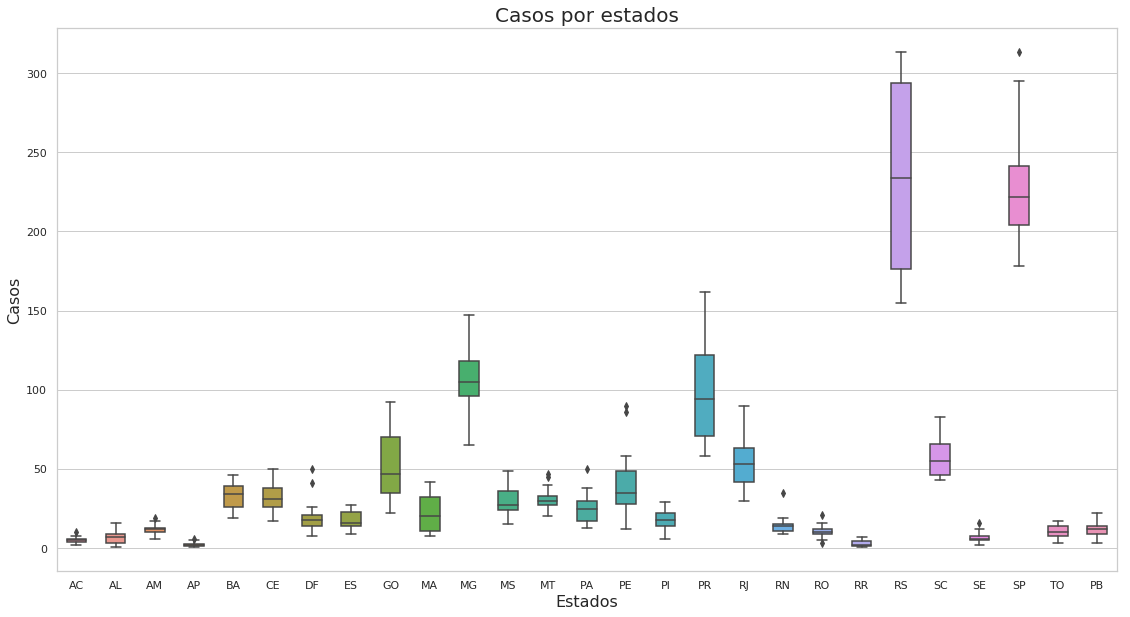

In [365]:
grafico = sns.boxplot(y='valor', x='nome', data=dados, orient='v', width=0.5)
grafico.figure.set_size_inches(19, 10)
grafico.set_title('Casos por estados', fontsize=20)
grafico.set_ylabel('Casos', fontsize=16)
grafico.set_xlabel('Estados', fontsize=16)
grafico



---


É possivel identificar a discrepancia dos dados principalmente nos estados de São Paulo e Rio Grande do sul:

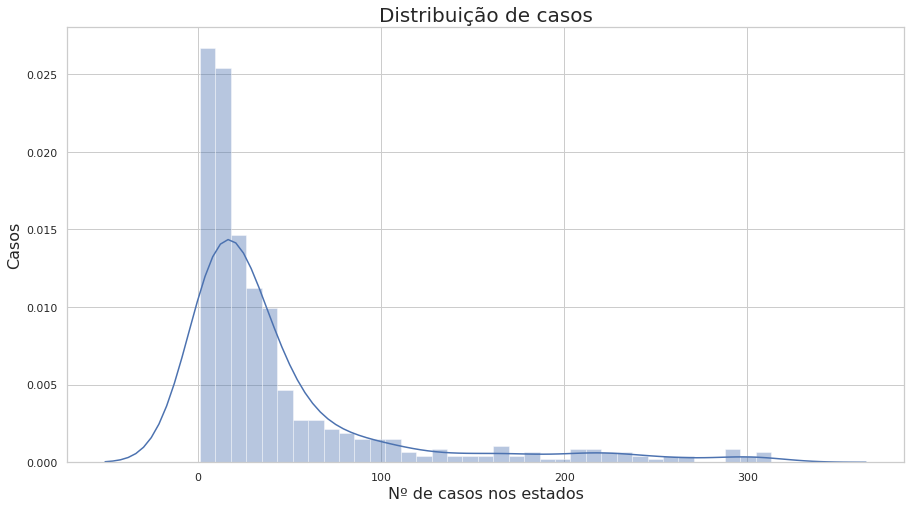

In [366]:
grafico = sns.distplot(dados['valor'])
grafico.figure.set_size_inches(15, 8)
grafico.set_title('Distribuição de casos', fontsize=20)
grafico.set_ylabel('Casos', fontsize=16)
grafico.set_xlabel('Nº de casos nos estados', fontsize=16)
grafico

Gráfico da analise de regressão

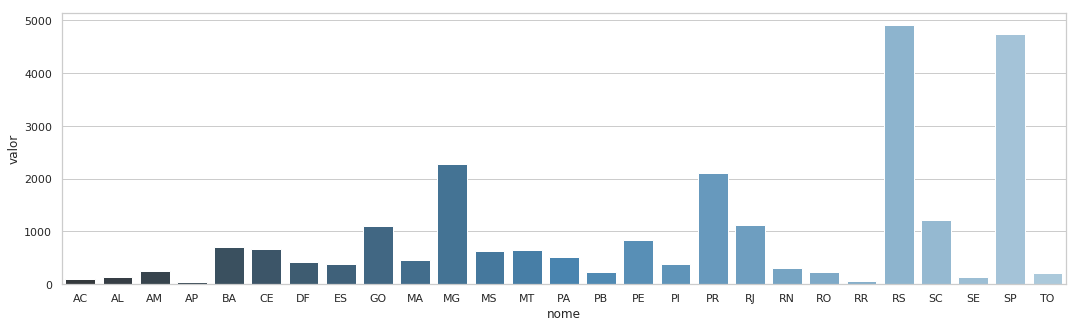

In [363]:
plt.figure(figsize=(18,5))
sns.set(style="whitegrid")
ax = sns.barplot(y='valor', x="nome", data=casos_estado, palette="Blues_d")
ax

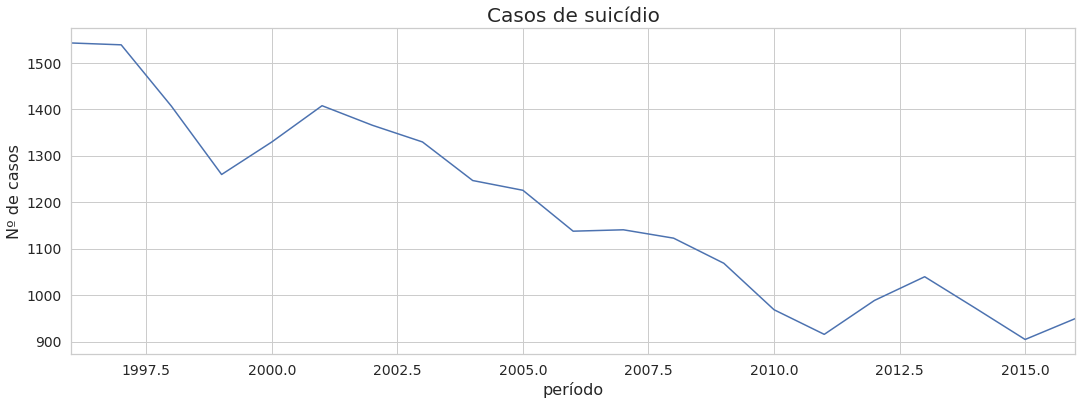

In [364]:
fig, grafico = plt.subplots(figsize=(18,6))
grafico.set_title('Casos de suicídio', fontsize=20)
grafico.set_ylabel('Nº de casos', fontsize=16)
grafico.set_xlabel('Anos', fontsize=16)
grafico = casos_ano['valor'].plot(fontsize=14)

# Análise por estados

Calculando a taxa de aumento

In [0]:
AC['aumento'] = AC['valor'].shift(-1) - AC['valor'] 
AL['aumento'] = AL['valor'].shift(-1) - AL['valor'] 
AM['aumento'] = AM['valor'].shift(-1) - AM['valor'] 
AP['aumento'] = AP['valor'].shift(-1) - AP['valor'] 
BA['aumento'] = BA['valor'].shift(-1) - BA['valor'] 
CE['aumento'] = CE['valor'].shift(-1) - CE['valor'] 
DF['aumento'] = DF['valor'].shift(-1) - DF['valor'] 
ES['aumento'] = ES['valor'].shift(-1) - ES['valor'] 
GO['aumento'] = GO['valor'].shift(-1) - GO['valor']  
MA['aumento'] = MA['valor'].shift(-1) - MA['valor'] 
MG['aumento'] = MG['valor'].shift(-1) - MG['valor'] 
MS['aumento'] = MS['valor'].shift(-1) - MS['valor'] 
MT['aumento'] = MT['valor'].shift(-1) - MT['valor'] 
PA['aumento'] = PA['valor'].shift(-1) - PA['valor'] 
PB['aumento'] = PB['valor'].shift(-1) - PB['valor'] 
PE['aumento'] = PE['valor'].shift(-1) - PE['valor']  
PI['aumento'] = PI['valor'].shift(-1) - PI['valor'] 
PR['aumento'] = PR['valor'].shift(-1) - PR['valor'] 
RJ['aumento'] = RJ['valor'].shift(-1) - RJ['valor'] 
RN['aumento'] = RN['valor'].shift(-1) - RN['valor'] 
RO['aumento'] = RO['valor'].shift(-1) - RO['valor'] 
RR['aumento'] = RR['valor'].shift(-1) - RR['valor'] 
RS['aumento'] = RS['valor'].shift(-1) - RS['valor']  
SC['aumento'] = SC['valor'].shift(-1) - SC['valor'] 
SE['aumento'] = SE['valor'].shift(-1) - SE['valor']  
SP['aumento'] = SP['valor'].shift(-1) - SP['valor'] 
TO['aumento'] = TO['valor'].shift(-1) - TO['valor'] 

Caclcula taxa de crescimento

In [0]:
AC['aceleracao'] = AC['aumento'].shift(-1) - AC['aumento'] 
AL['aceleracao'] = AL['aumento'].shift(-1) - AL['aumento'] 
AM['aceleracao'] = AM['aumento'].shift(-1) - AM['aumento'] 
AP['aceleracao'] = AP['aumento'].shift(-1) - AP['aumento'] 
BA['aceleracao'] = BA['aumento'].shift(-1) - BA['aumento'] 
CE['aceleracao'] = CE['aumento'].shift(-1) - CE['aumento'] 
DF['aceleracao'] = DF['aumento'].shift(-1) - DF['aumento'] 
ES['aceleracao'] = ES['aumento'].shift(-1) - ES['aumento'] 
GO['aceleracao'] = GO['aumento'].shift(-1) - GO['aumento']  
MA['aceleracao'] = MA['aumento'].shift(-1) - MA['aumento'] 
MG['aceleracao'] = MG['aumento'].shift(-1) - MG['aumento'] 
MS['aceleracao'] = MS['aumento'].shift(-1) - MS['aumento'] 
MT['aceleracao'] = MT['aumento'].shift(-1) - MT['aumento'] 
PA['aceleracao'] = PA['aumento'].shift(-1) - PA['aumento'] 
PB['aceleracao'] = PB['aumento'].shift(-1) - PB['aumento'] 
PE['aceleracao'] = PE['aumento'].shift(-1) - PE['aumento']  
PI['aceleracao'] = PI['aumento'].shift(-1) - PI['aumento'] 
PR['aceleracao'] = PR['aumento'].shift(-1) - PR['aumento'] 
RJ['aceleracao'] = RJ['aumento'].shift(-1) - RJ['aumento'] 
RN['aceleracao'] = RN['aumento'].shift(-1) - RN['aumento'] 
RO['aceleracao'] = RO['aumento'].shift(-1) - RO['aumento'] 
RR['aceleracao'] = RR['aumento'].shift(-1) - RR['aumento'] 
RS['aceleracao'] = RS['aumento'].shift(-1) - RS['aumento']  
SC['aceleracao'] = SC['aumento'].shift(-1) - SC['aumento'] 
SE['aceleracao'] = SE['aumento'].shift(-1) - SE['aumento']  
SP['aceleracao'] = SP['aumento'].shift(-1) - SP['aumento'] 
TO['aceleracao'] = TO['aumento'].shift(-1) - TO['aumento'] 

Limpa os nulos

In [0]:
AC= AC.fillna(0)
AL= AL.fillna(0)
AM= AM.fillna(0)
AP= AP.fillna(0)
BA= BA.fillna(0)
CE= CE.fillna(0)
DF= DF.fillna(0)
ES= ES.fillna(0)
GO= GO.fillna(0)
MG= MG.fillna(0)
MS= MS.fillna(0)
MT= MT.fillna(0)
PA= PA.fillna(0)
PB= PB.fillna(0)
PE= PE.fillna(0)
PI= PI.fillna(0)
PR= PR.fillna(0)
RJ= RJ.fillna(0)
RN= RN.fillna(0)
RO= RO.fillna(0)
RR= RR.fillna(0)
RS= RS.fillna(0)
SC= SC.fillna(0)
SE= SE.fillna(0)
SP= SP.fillna(0)
TO= TO.fillna(0)

##Gráficos para o estado do Acre

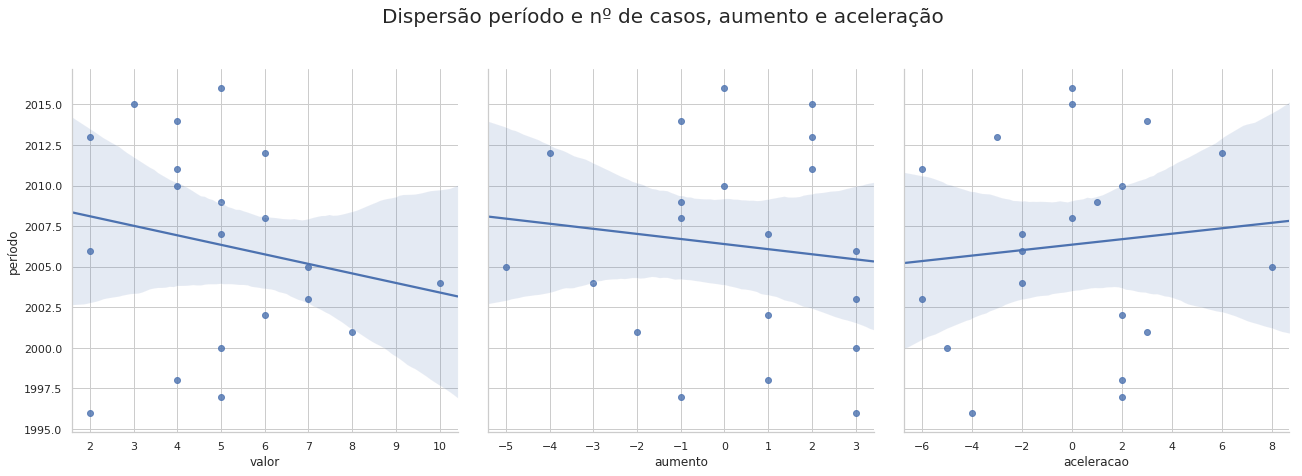

In [368]:
grafico = sns.pairplot(AC, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráfico para o estado de Alagoas


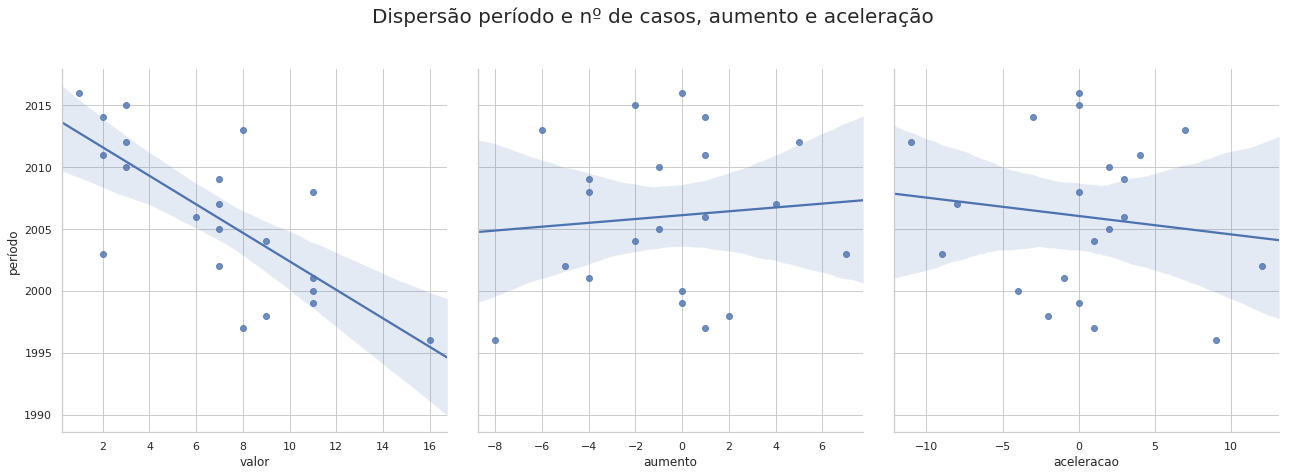

In [369]:
grafico = sns.pairplot(AL, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráfico para o estado do Amapá

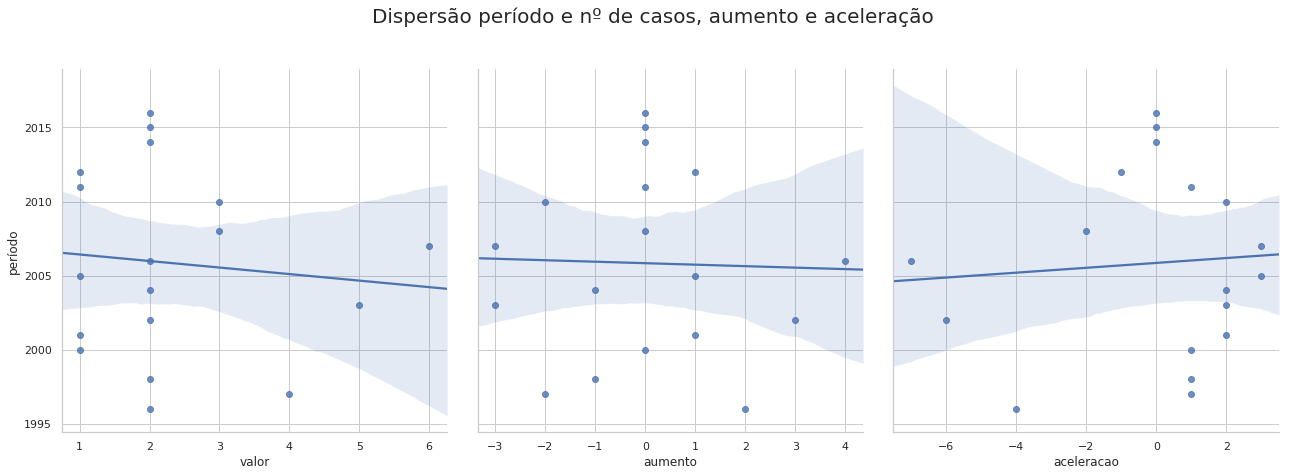

In [370]:
grafico = sns.pairplot(AP, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráficos para o estado do Amazonas

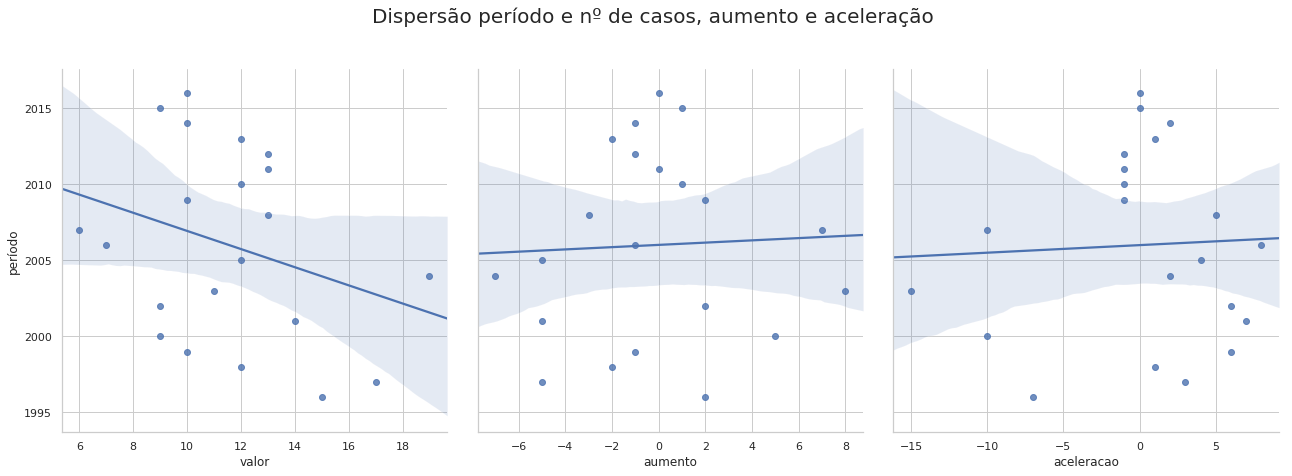

In [371]:
grafico = sns.pairplot(AM, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráficos para o estado da Bahia

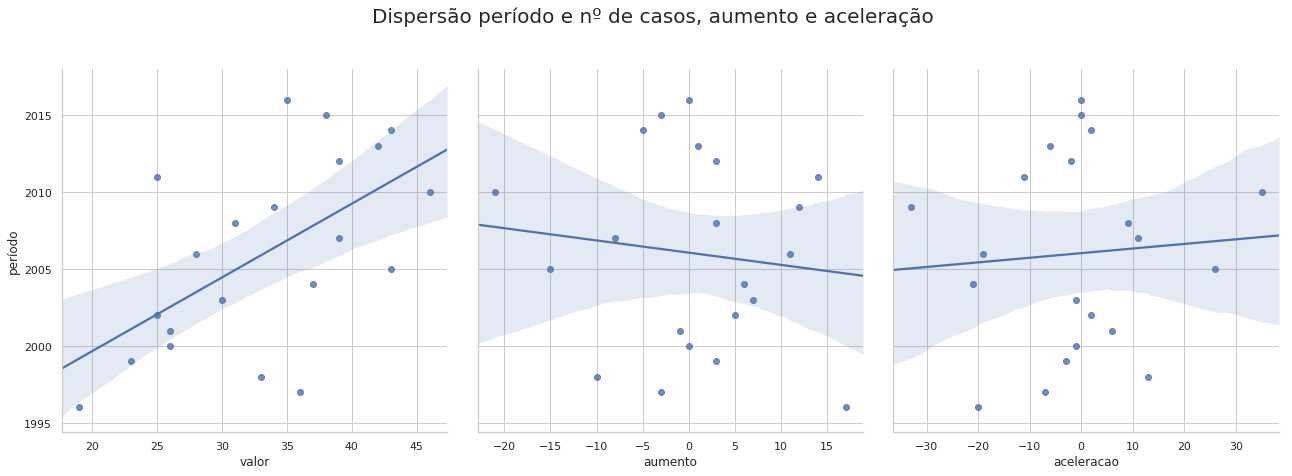

In [372]:
grafico = sns.pairplot(BA, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráficos para o estado do Ceará

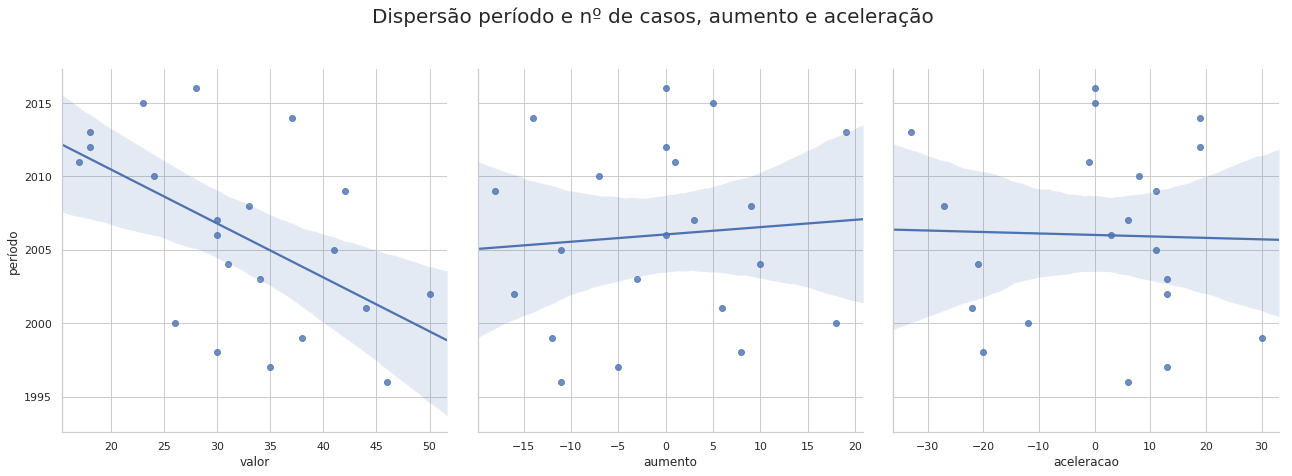

In [373]:
grafico = sns.pairplot(CE, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráficos para o estado do Distrito Federal

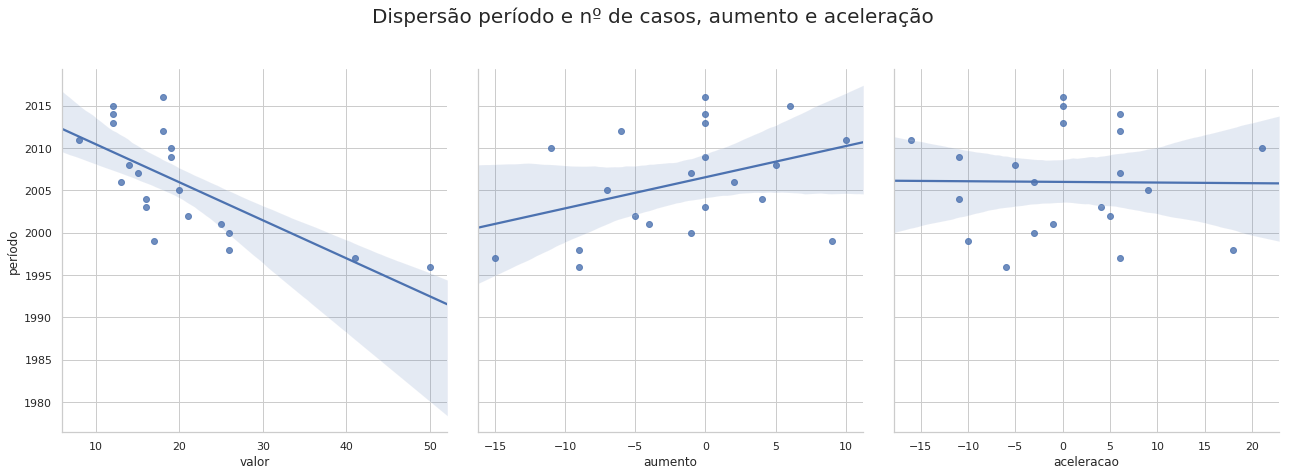

In [374]:
grafico = sns.pairplot(DF, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráficos para o estado do Espírito Santo

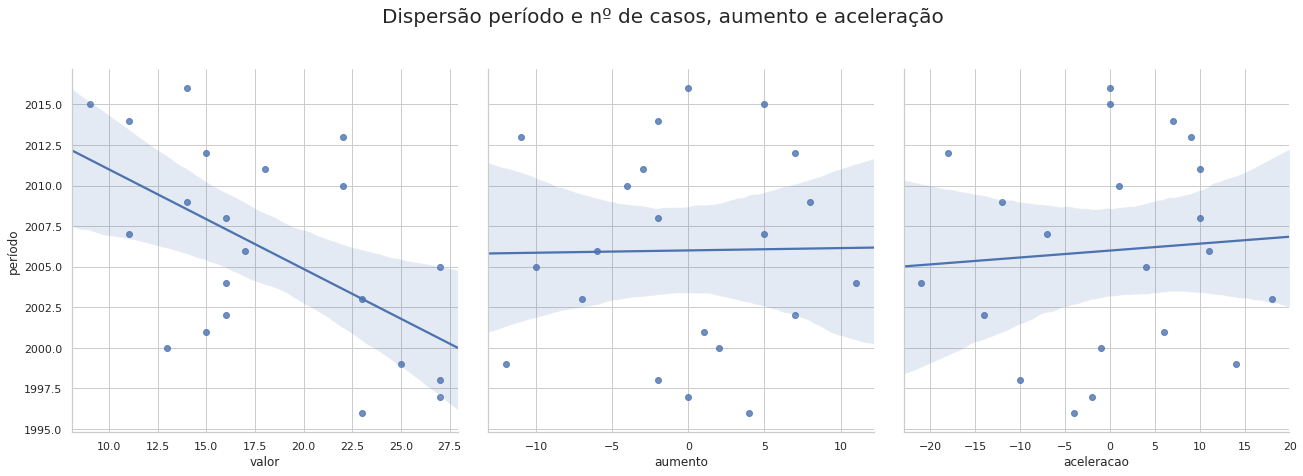

In [375]:
grafico = sns.pairplot(ES, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráficos para o estado de Goiás

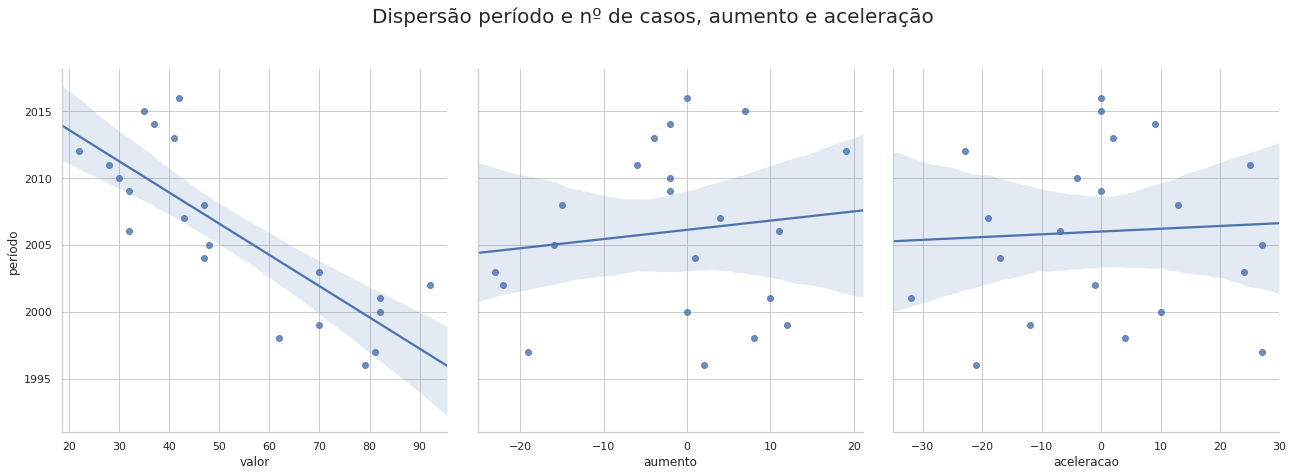

In [376]:
grafico = sns.pairplot(GO, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráficos para o estado do Maranhão

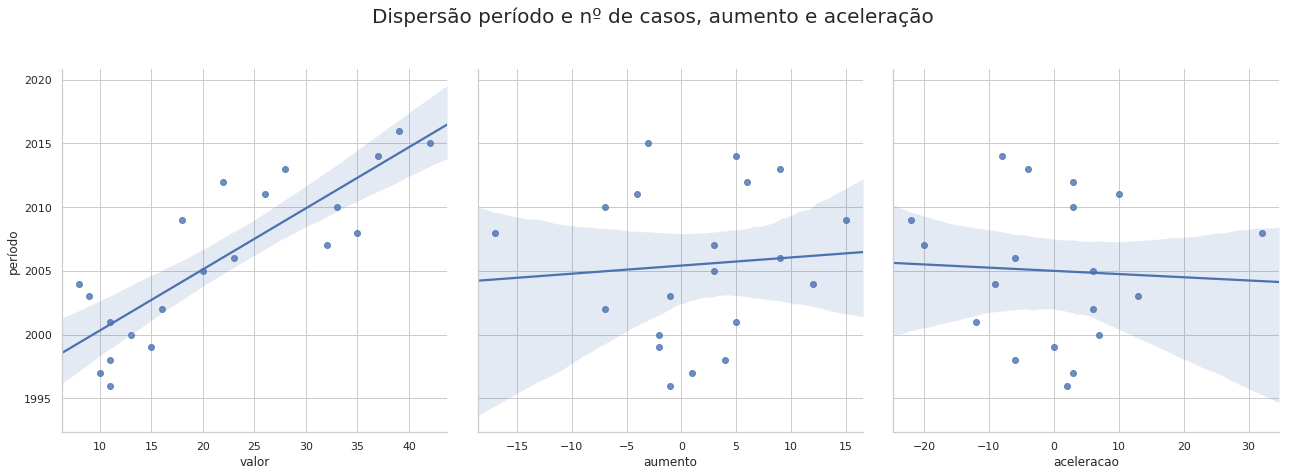

In [377]:
grafico = sns.pairplot(MA, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráficos para o estado do Mato Grosso

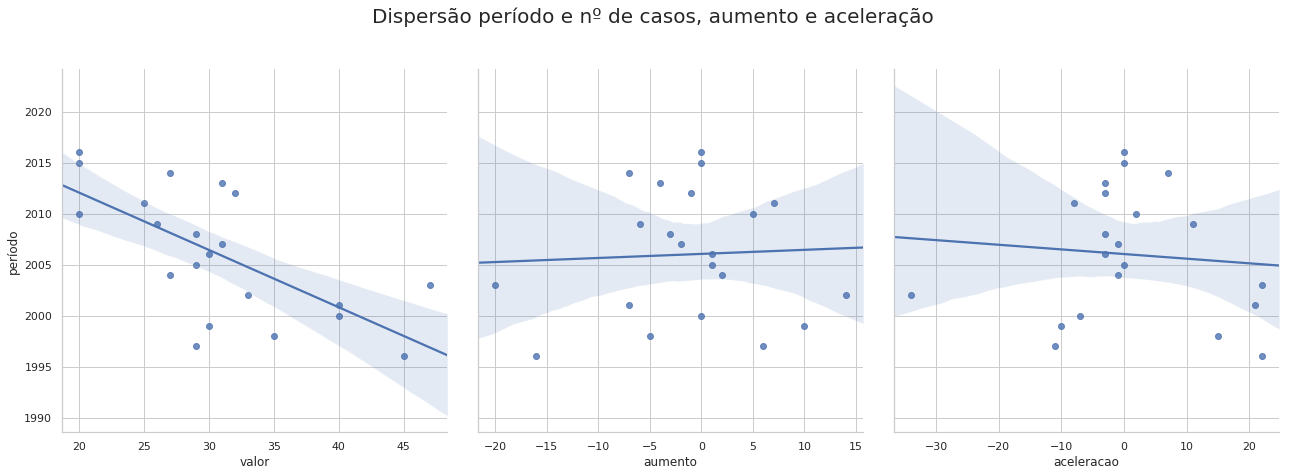

In [378]:
grafico = sns.pairplot(MT, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráficos para o estado do Mato Grosso do Sul

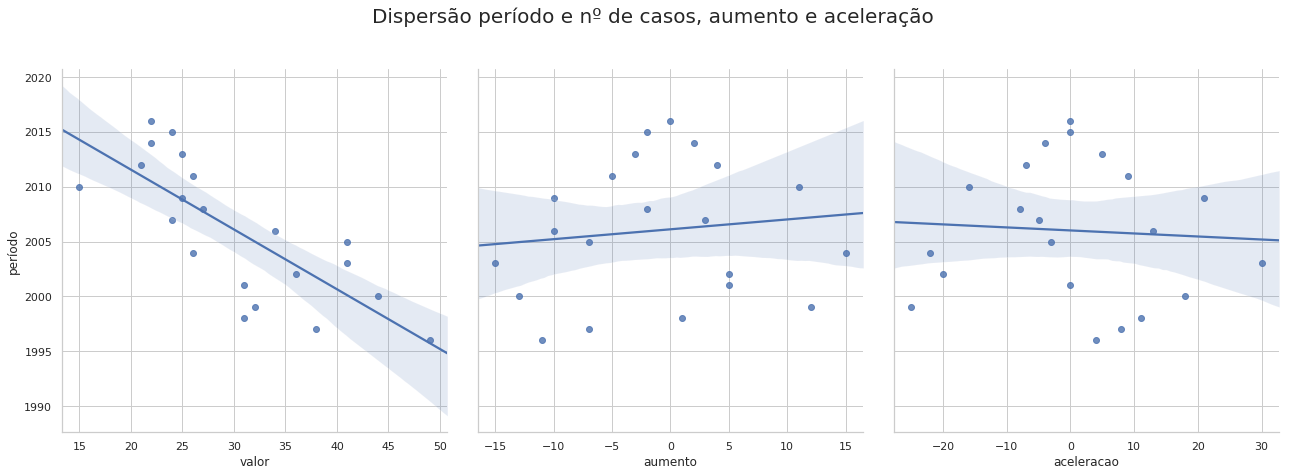

In [379]:
grafico = sns.pairplot(MS, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráficos para o estado de Minas Gerais

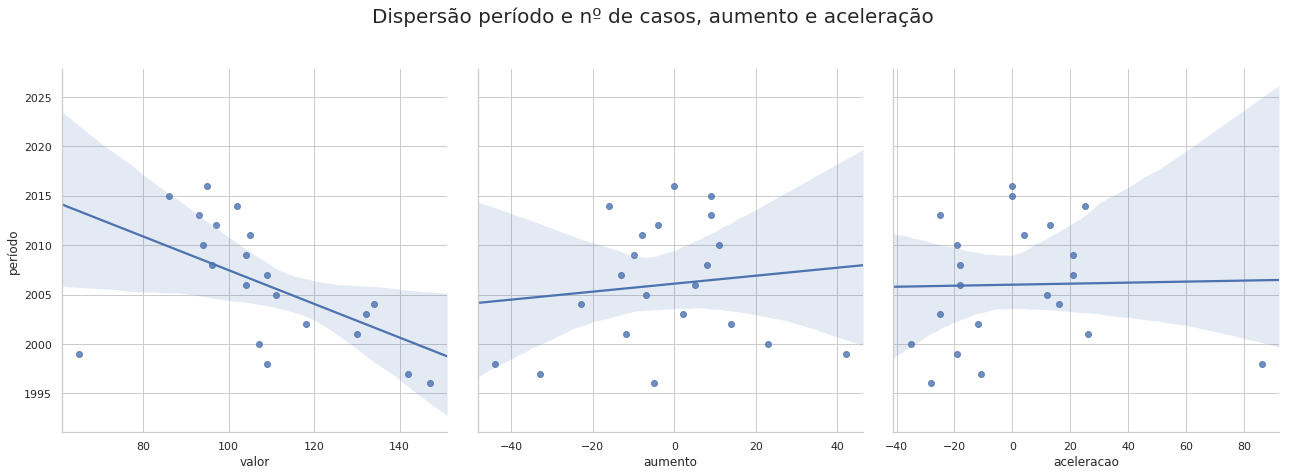

In [380]:
grafico = sns.pairplot(MG, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráficos para o estado do Pará

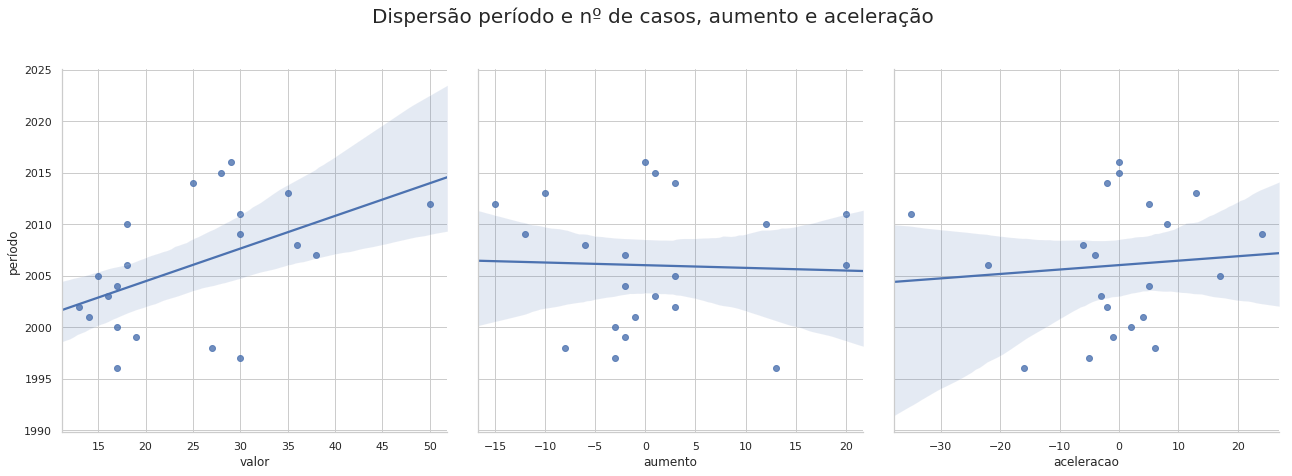

In [381]:
grafico = sns.pairplot(PA, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráficos para o estado da Paraibá

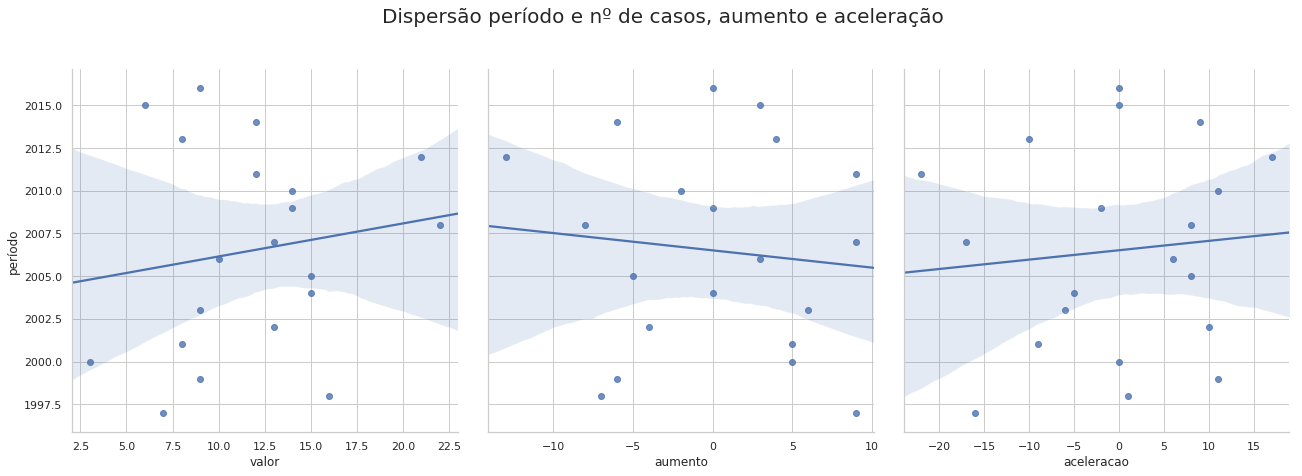

In [382]:
grafico = sns.pairplot(PB, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráficos para o estado do Paraná

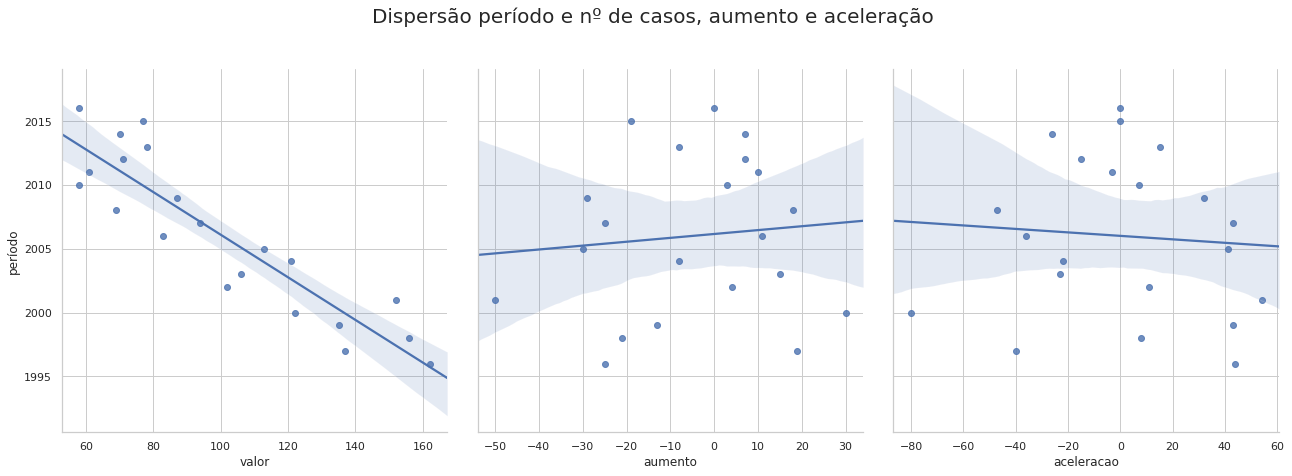

In [383]:
grafico = sns.pairplot(PR, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráficos para o estado de Pernambuco

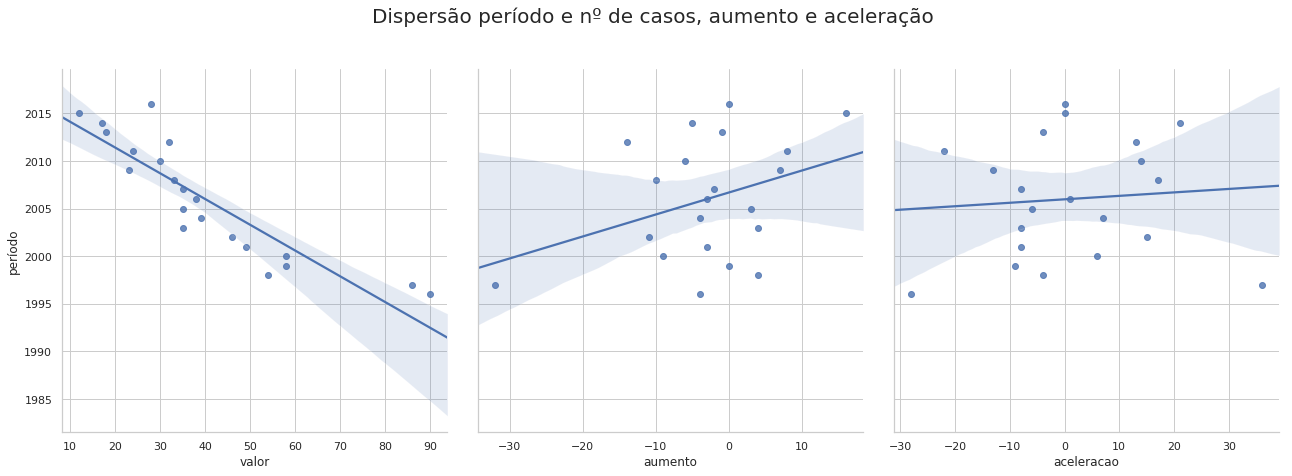

In [384]:
grafico = sns.pairplot(PE, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráficos para o estado do Piauí

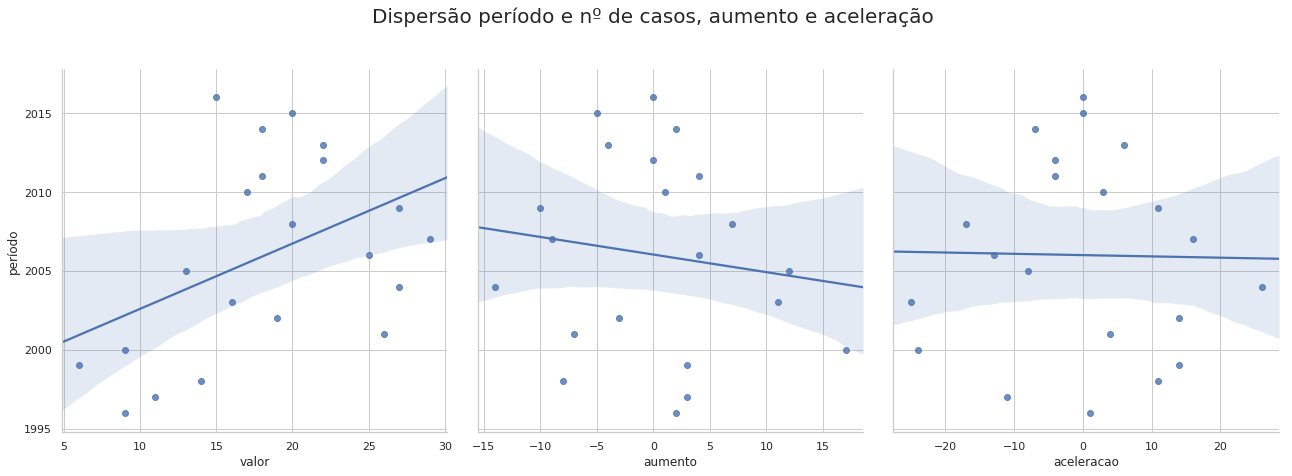

In [385]:
grafico = sns.pairplot(PI, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráficos para o estado do Rio de Janeiro

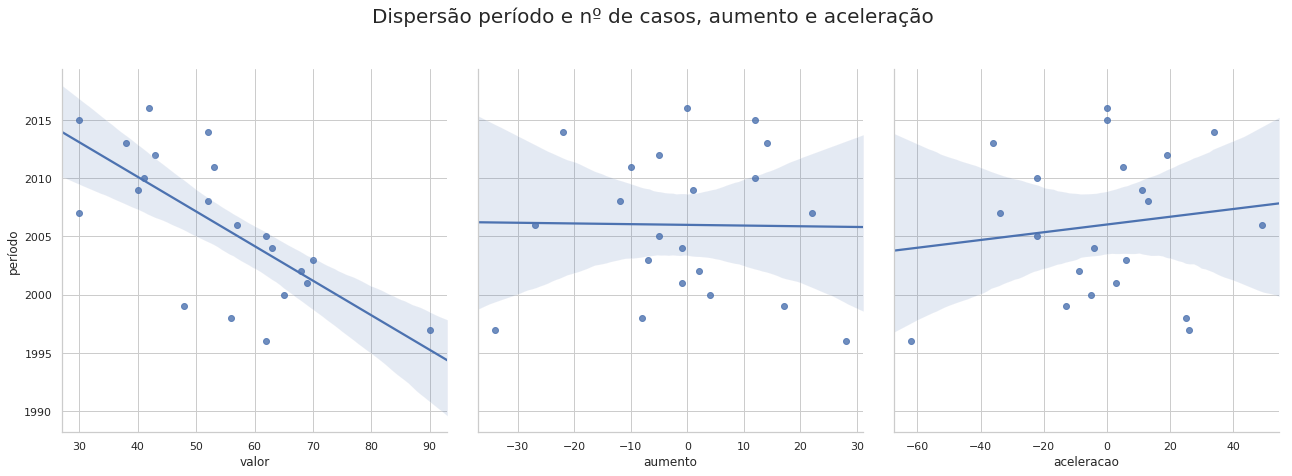

In [386]:
grafico = sns.pairplot(RJ, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráficos para o estado do Rio Grande do Norte

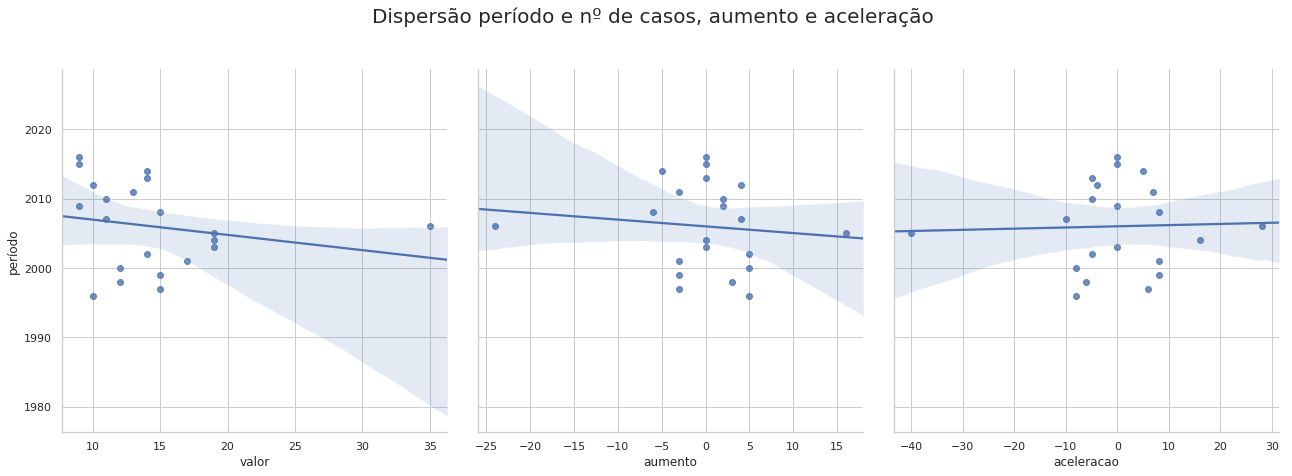

In [387]:
grafico = sns.pairplot(RN, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráficos para o estado do Rio Grande do Sul

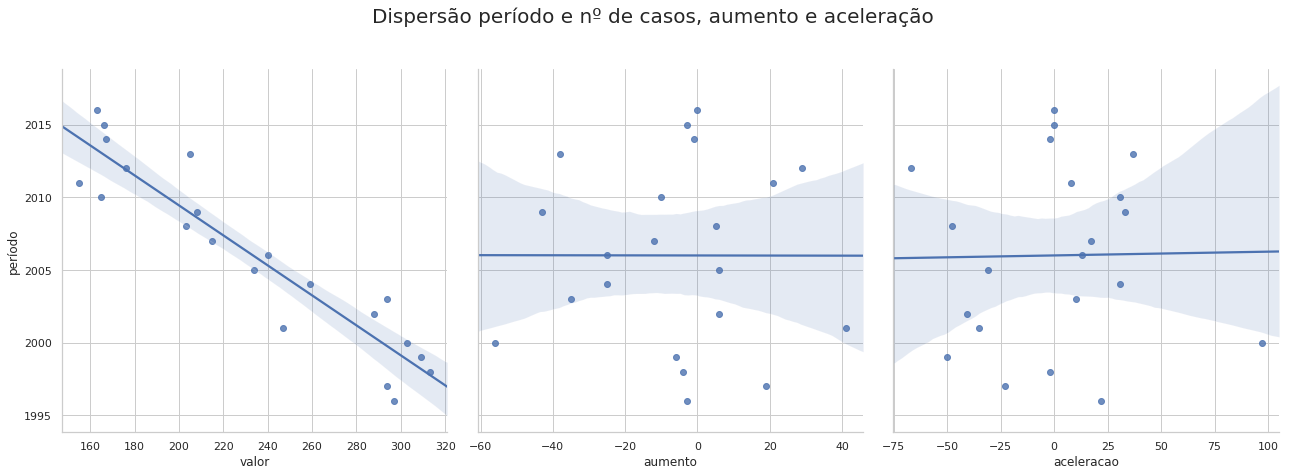

In [388]:
grafico = sns.pairplot(RS, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráficos para o estado de Rondônia

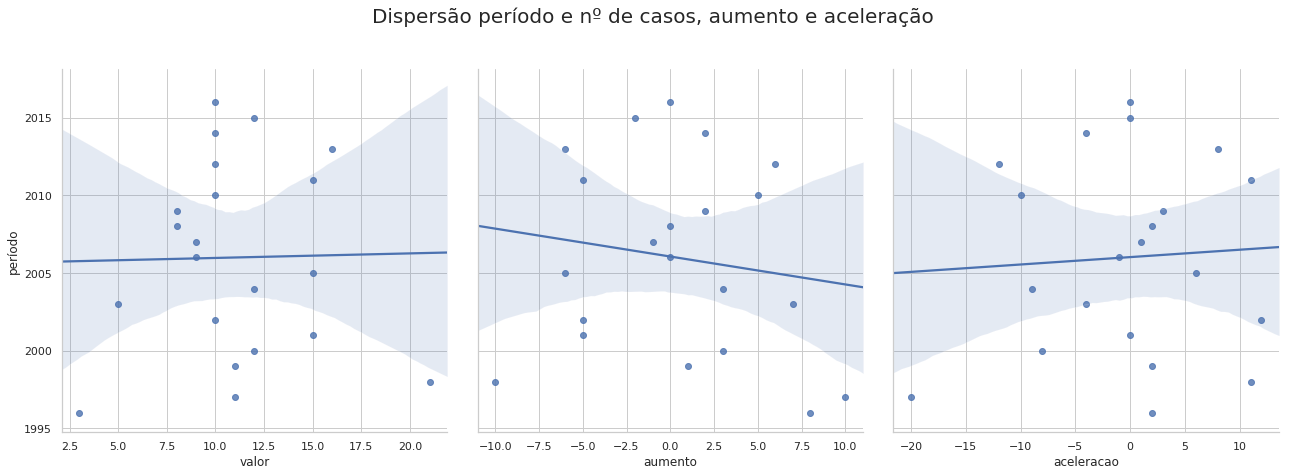

In [389]:
grafico = sns.pairplot(RO, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráficos para o estado de Roraima

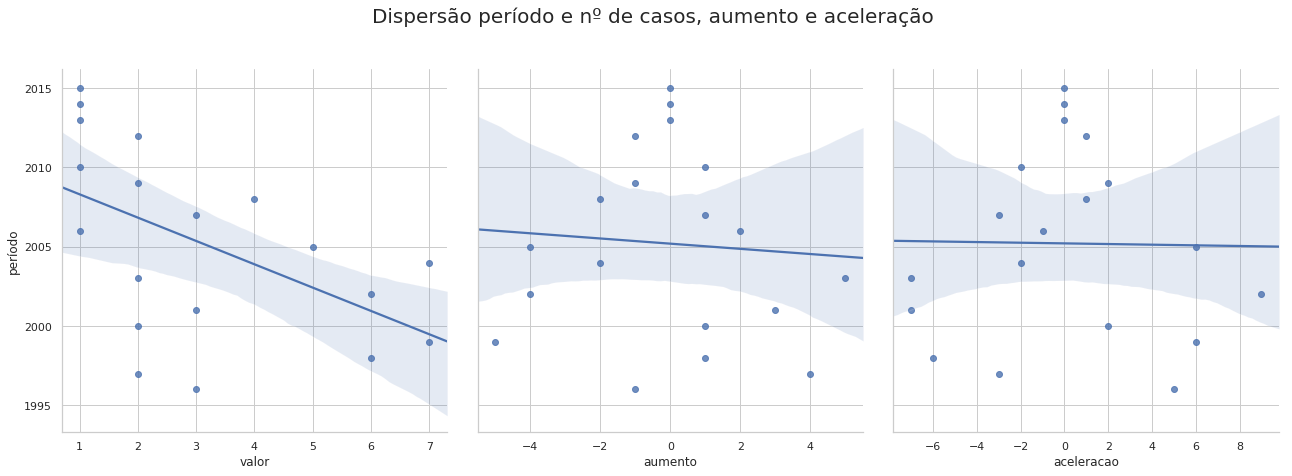

In [390]:
grafico = sns.pairplot(RR, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráficos para o estado de Santa Catarina

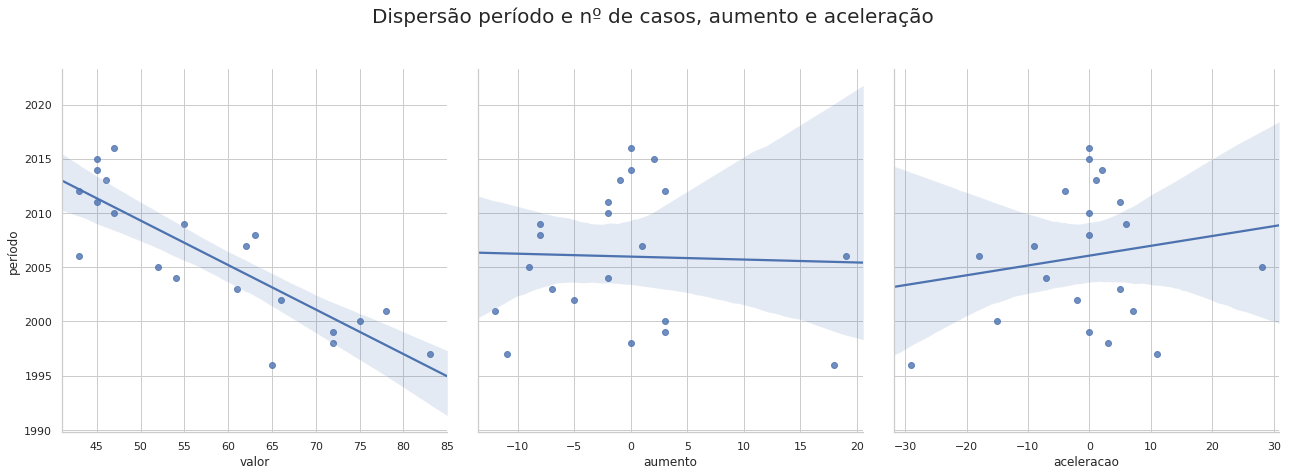

In [391]:
grafico = sns.pairplot(SC, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráficos para o estado de São Paulo

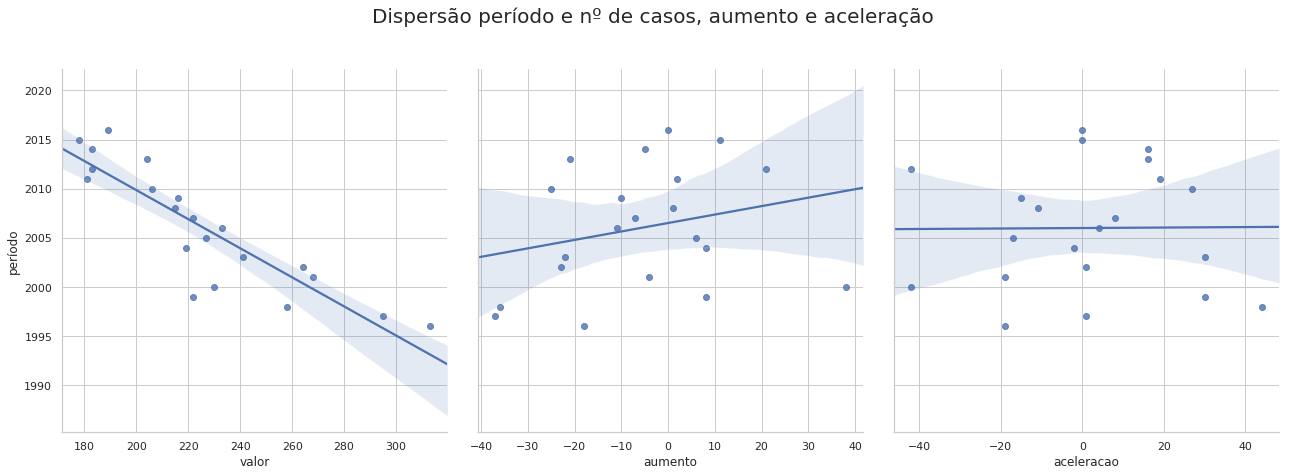

In [392]:
grafico = sns.pairplot(SP, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráficos para o estado de Sergipe

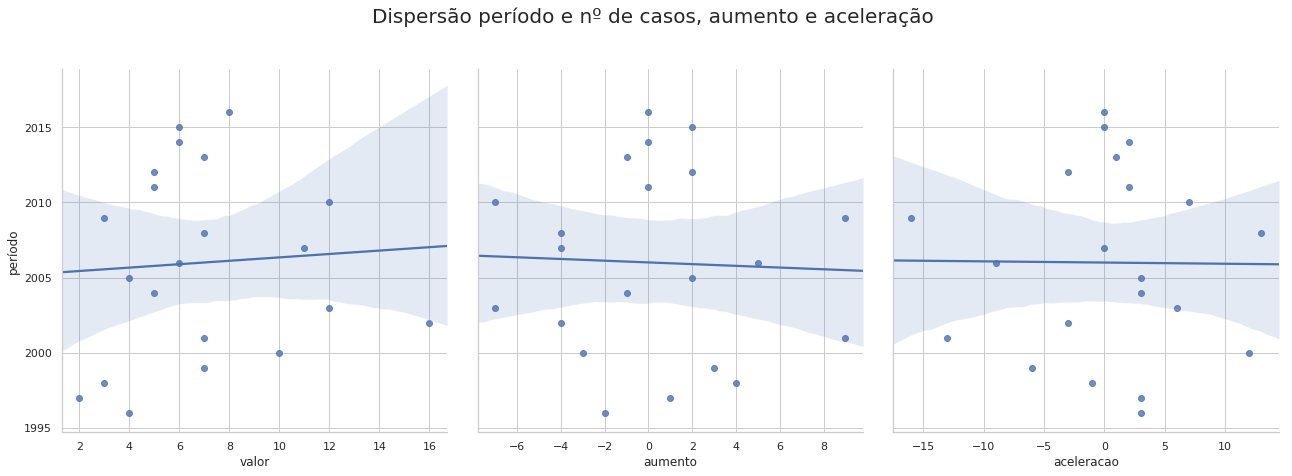

In [393]:
grafico = sns.pairplot(SE, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico

## Gráficos para o estado do Tocantins

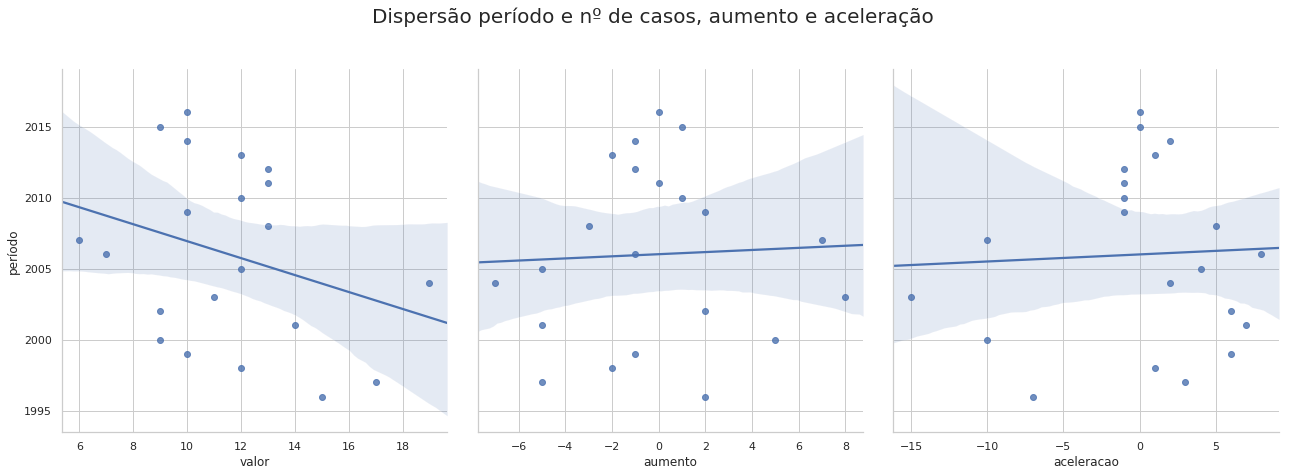

In [394]:
grafico = sns.pairplot(AM, y_vars='período', x_vars=['valor', 'aumento', 'aceleracao'], kind='reg', height=6)
grafico.fig.suptitle('Dispersão período e nº de casos, aumento e aceleração', fontsize=20, y=1.1)
grafico